In [42]:
from robustica import RobustICA, InferComponents, sampledata
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from sklearn.datasets import fetch_openml
mice = fetch_openml(name='miceprotein', version=4)
X = mice['data']
X[np.isnan(X)] = 0

In [16]:
inference = InferComponents()
inference.fit(X)

*E. coli* dataset

## with Icasso method

In [5]:
rica = RobustICA(n_components=10,
                 n_jobs=10,
                 robust_method='icasso', 
                 robust_kws={'distance_threshold':0.8,'n_clusters':None})
rica.fit(X.values)

/home/miquel/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/home/miquel/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/home/miquel/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/home/miquel/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of i

In [6]:
rica.clustering_stats_

,cluster_id,cluster_size,S_mean_std,A_mean_std
0,0.0,88.0,0.068718,0.508527
1,1.0,94.0,0.062477,0.471013
2,2.0,103.0,0.069439,0.507592
3,3.0,99.0,0.043456,0.315184
4,4.0,94.0,0.057645,0.435736
5,5.0,7.0,0.045697,0.365291
6,6.0,90.0,0.034008,0.260972
7,7.0,99.0,0.028647,0.213995
8,8.0,92.0,0.050760,0.391249
9,9.0,97.0,0.045878,0.346481


## with Sastry method

In [28]:
rica = RobustICA(n_components=inference.inferred_components_,
                 n_jobs=10,
                 robust_method='sastry', 
                 robust_kws={'min_samples':5, 'n_jobs':10})
rica.fit(X)

/home/miquel/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/home/miquel/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/home/miquel/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/home/miquel/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of i

In [29]:
rica.clustering_stats_

,cluster_id,cluster_size,S_mean_std,A_mean_std
0,0.0,1300.0,0.028939,1.073877
1,1.0,100.0,0.001445,0.059388
2,2.0,100.0,0.003927,0.176134
3,3.0,100.0,0.004286,0.185919
4,4.0,100.0,0.000550,0.022831
5,5.0,100.0,0.003159,0.131605
6,6.0,100.0,0.004975,0.238966
7,7.0,100.0,0.000761,0.027054
8,8.0,100.0,0.001853,0.071220
9,9.0,100.0,0.001752,0.061133


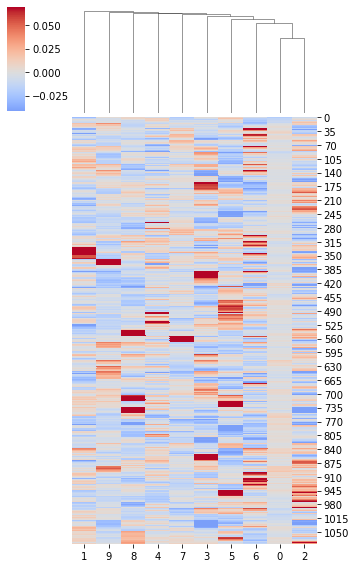

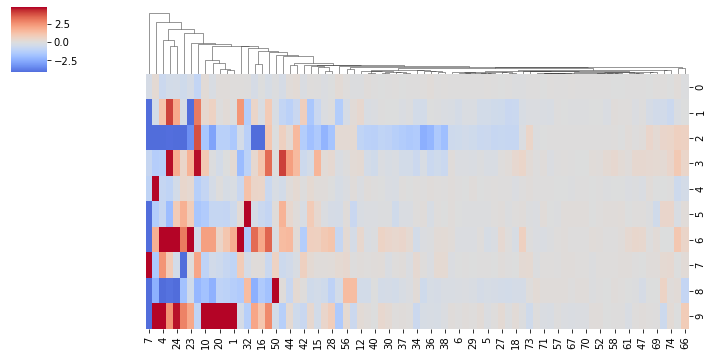

In [43]:
sns.clustermap(rica.S, row_cluster=False, cmap='coolwarm', center=0, figsize=(5,8), robust=True)
sns.clustermap(rica.A.T, row_cluster=False, cmap='coolwarm', center=0, figsize=(10,5), robust=True)
plt.show()

## with DBSCAN

In [24]:
rica = RobustICA(n_components=10,
                 n_jobs=10,
                 tol=1e-3,
                 robust_method='DBSCAN',
                 robust_kws={'min_samples':5, 'n_jobs':10})
rica.fit(X)

/home/miquel/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/home/miquel/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/home/miquel/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/home/miquel/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of i

In [25]:
rica.clustering_stats_

,cluster_id,cluster_size,S_mean_std,A_mean_std
0,-1.0,12.0,0.024416,1.201806
1,0.0,185.0,0.021415,1.025566
2,1.0,40.0,0.005056,0.287484
3,2.0,44.0,0.000639,0.032251
4,3.0,52.0,0.007320,0.325889
5,4.0,50.0,0.011261,0.620056
6,5.0,45.0,0.007917,0.431110
7,6.0,53.0,0.006589,0.379326
8,7.0,47.0,0.001013,0.052456
9,8.0,42.0,0.006564,0.328500
